<a href="https://colab.research.google.com/github/Chirag050/Computer_Vision/blob/main/DLCV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chirag Prasad
# 102322021
# 3V11

# Sobel Filter

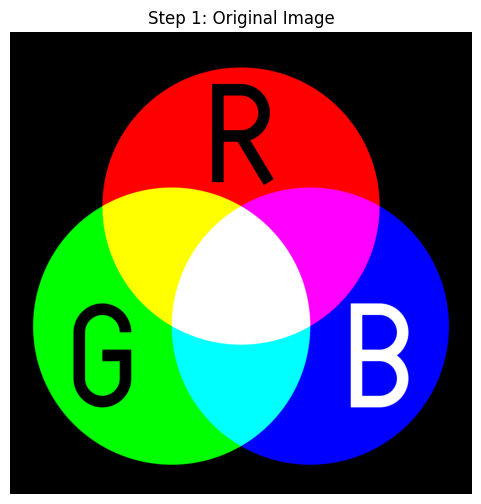

Image read successfully. Dimensions: (1200, 1200, 3)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = 'sample_image.jpg'

# OpenCV reads images in BGR format by default
img = cv2.imread(image_path)

# 3. Convert from BGR to RGB
# Matplotlib expects RGB, so we must convert it to display colors correctly
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4. Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Step 1: Original Image")
plt.axis('off') # Hide axis ticks
plt.show()

# Print image dimensions for verification
print(f"Image read successfully. Dimensions: {img.shape}")

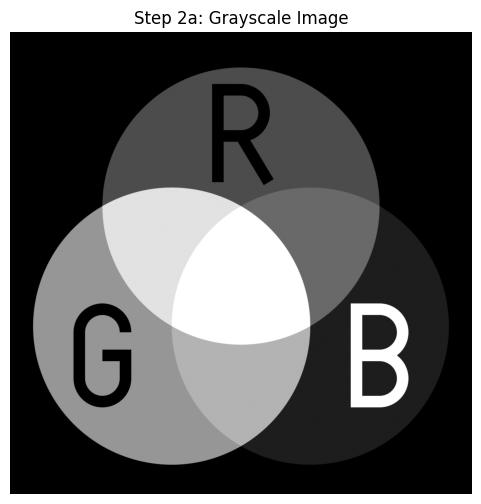

Sobel X Kernel:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Sobel Y Kernel:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [ ]:
# 1. Convert the image to Grayscale
# We use the variable 'img' from Step 1
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image to confirm
plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Step 2a: Grayscale Image")
plt.axis('off')
plt.show()

# 2. Define the Sobel Kernels manually
# We use numpy arrays to create the 3x3 matrices

# Sobel X (Vertical Edge Detection)
# This detects changes in the Horizontal direction (Left to Right)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Sobel Y (Horizontal Edge Detection)
# This detects changes in the Vertical direction (Top to Bottom)
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

print("Sobel X Kernel:\n", sobel_x)
print("\nSobel Y Kernel:\n", sobel_y)

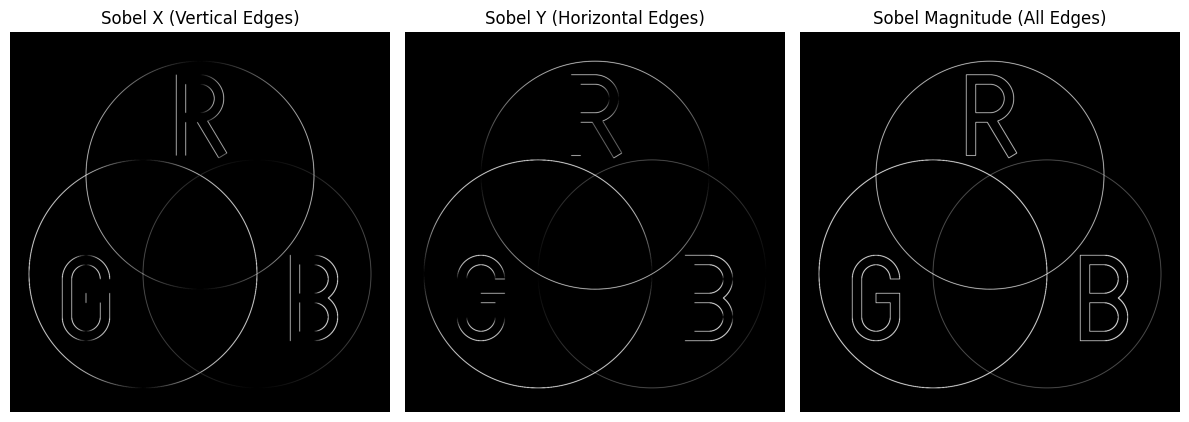

In [ ]:
# 1. Apply the Sobel Kernels using filter2D
# We use cv2.CV_64F (64-bit float) because the gradients can be negative.
# If we used uint8, negative values would be clipped to 0, losing edge info.
grad_x = cv2.filter2D(img_gray, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img_gray, cv2.CV_64F, sobel_y)

# 2. Convert to Absolute Values
# We only care about the *strength* of the edge, not the direction (positive/negative).
# Example: A transition from Black->White is positive, White->Black is negative.
# Both are edges, so we take the absolute value.
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# 3. Calculate the Magnitude (Total Edge Strength)
# Formula: G = sqrt(Gx^2 + Gy^2)
magnitude = cv2.magnitude(grad_x, grad_y)
# Convert magnitude to uint8 for display
magnitude = cv2.convertScaleAbs(magnitude)

# 4. Display the Results
plt.figure(figsize=(12, 6))

# Plot X-Direction Gradients
plt.subplot(1, 3, 1)
plt.imshow(abs_grad_x, cmap='gray')
plt.title("Sobel X (Vertical Edges)")
plt.axis('off')

# Plot Y-Direction Gradients
plt.subplot(1, 3, 2)
plt.imshow(abs_grad_y, cmap='gray')
plt.title("Sobel Y (Horizontal Edges)")
plt.axis('off')

# Plot Magnitude (Combined)
plt.subplot(1, 3, 3)
plt.imshow(magnitude, cmap='gray')
plt.title("Sobel Magnitude (All Edges)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Hough Transformation

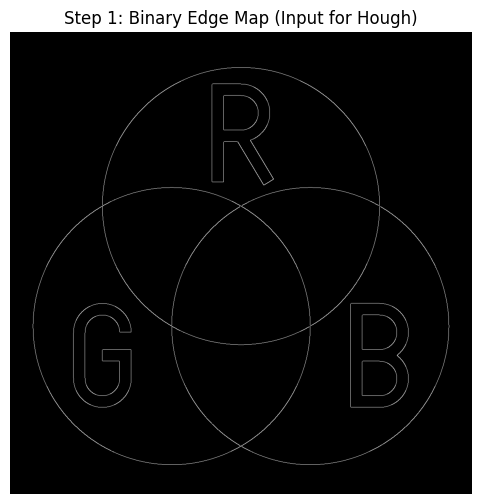

In [ ]:
# 1. Edge Feature Detection using Canny
# Thresholds (50, 150) determine which gradients are "strong" enough to be edges
edges_binary = cv2.Canny(img_gray, 50, 150)

# Display the binary edge map
plt.figure(figsize=(6, 6))
plt.imshow(edges_binary, cmap='gray')
plt.title("Step 1: Binary Edge Map (Input for Hough)")
plt.axis('off')
plt.show()

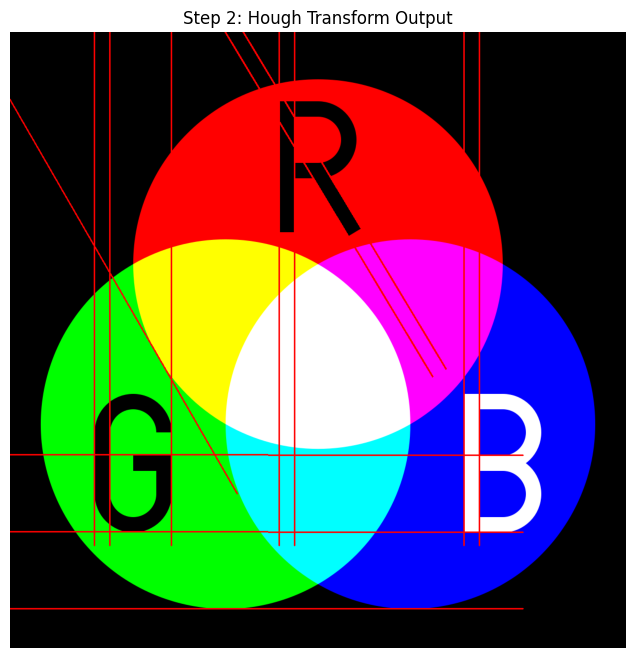

In [ ]:
# 2. Apply Hough Line Transform
# rho: Distance resolution of the accumulator in pixels (1 pixel)
# theta: Angle resolution of the accumulator in radians (1 degree)
# threshold: Accumulator threshold parameter (votes). Only lines with > 100 votes are returned.
lines = cv2.HoughLines(edges_binary, 1, np.pi/180, 100)

# Create a copy of the original image to draw lines on
hough_output = img_rgb.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]

        # Convert Polar coordinates (rho, theta) to Cartesian (x, y)
        # to find two points on the line for drawing
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        # Extrapolate 1000 pixels in each direction to draw the full line
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw the line on the image in Red color
        cv2.line(hough_output, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the final output
plt.figure(figsize=(8, 8))
plt.imshow(hough_output)
plt.title("Step 2: Hough Transform Output")
plt.axis('off')
plt.show()


The result you see in Step 2 is not just "lines drawn on a picture." It is the visual representation of a transformation between two coordinate spaces: Image Space $(x, y)$ and Hough Space $(\rho, \theta)$.Here is the engineering interpretation of what just happened:Voting System:Every white pixel in the binary edge map (Step 1) "voted" for every possible line that could pass through it.The Accumulator:The algorithm created a 2D array (the Accumulator). The axes of this array are $\rho$ (distance from origin) and $\theta$ (angle).For every edge pixel $(x, y)$, the algorithm calculated $\rho = x \cos \theta + y \sin \theta$ for all $\theta$.It incremented the value in the Accumulator at the corresponding $(\rho, \theta)$ bin.Peak Detection:The lines you see drawn in red represent the local maxima (peaks) in that Accumulator array.If a bin $(\rho, \theta)$ has 100 votes (our threshold), it means 100 separate pixels in your image all aligned perfectly along the line defined by that $\rho$ and $\theta$.In summary: The Hough Transform converts "local" information (individual edge pixels) into "global" information (geometric structures/lines).
